### load important modules 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 
import warnings 
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
print('done')

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gurdit559/canada-per-capita-income-single-variable-data-set")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\gurdit559\canada-per-capita-income-single-variable-data-set\versions\1


In [11]:
# file read 
file_path = path +'/'+ os.listdir(path)[0] # file name pass
# read data
df = pd.read_csv(file_path)
print('done')

done


In [12]:
# EDA part 
df.head()


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [13]:
df.shape

(47, 2)

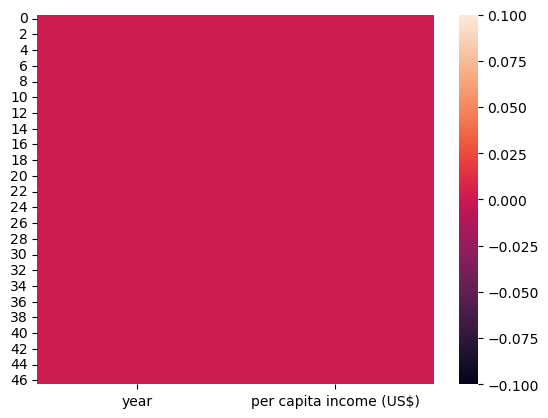

In [14]:
sns.heatmap(df.isna())
plt.show()

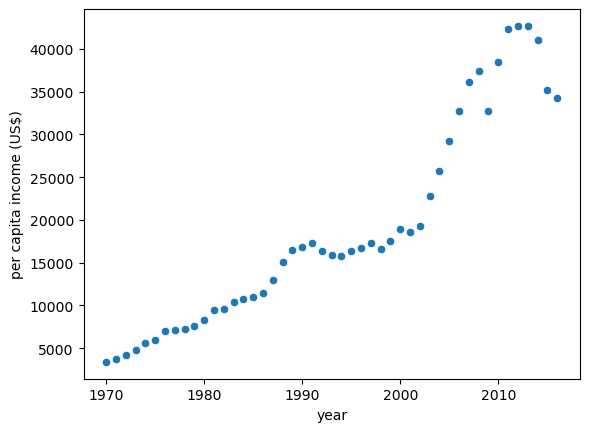

In [15]:
# sns.lineplot(data = df, x = 'year', y = 'per capita income (US$)')
sns.scatterplot(data = df, x = 'year', y = 'per capita income (US$)')
plt.show()





In [16]:
df.corr()

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


In [18]:
# Eda : detail

In [19]:
df.sample()

,year,per capita income (US$)
42,2012,42665.25597


In [22]:
X= df[['year']] # data frame
y = df['per capita income (US$)'] # series ma pass 

print('done')


done


In [25]:
#df[['year']]

In [26]:
model = LinearRegression()
model.fit(X,y) # hyper parameters : model fine tune 
# Hyper Tune:
# (data: predict: next future data: false: wrong Prediction)

LinearRegression()

In [31]:
year = [[2017]]
capita = round(model.predict(year)[0],2)
print(f'''per capita $ 
{year[0][0]}:{capita}''')

per capita $ 
2017:38803.3


In [32]:
 y_pred = model.predict(X)
print('done')

done


In [33]:
df.sample()

,year,per capita income (US$)
28,1998,16622.67187


In [34]:
df['Predicted Capita'] = y_pred

In [35]:
df.head(10)

,year,per capita income (US$),Predicted Capita
0,1970,3399.299037,-134.559667
1,1971,3768.297935,693.905409
2,1972,4251.175484,1522.370484
3,1973,4804.463248,2350.835559
4,1974,5576.514583,3179.300634
5,1975,5998.144346,4007.765709
6,1976,7062.131392,4836.230785
7,1977,7100.126170,5664.695860
8,1978,7247.967035,6493.160935
9,1979,7602.912681,7321.626010


In [41]:
#MAE
mae = ((df['per capita income (US$)'] - df['Predicted Capita']).abs()).mean() # differnce known as residuals 

In [42]:
# MAE
from sklearn.metrics import mean_absolute_error

In [44]:
# evaluate () the model 
MAE = mean_absolute_error(y , y_pred)

In [45]:
print('mannual mae ' , mae)
print('mannual mae ' , MAE)

mannual mae  3088.866427771443
mannual mae  3088.866427771443


In [49]:
mse = (((df['per capita income (US$)'] - df['Predicted Capita'])**2).abs()).mean()
mse

np.float64(15462739.061504772)

In [50]:
from sklearn.metrics import mean_squared_error #through model 

In [52]:
MSE = mean_squared_error(y , y_pred)
MSE

15462739.061504772

In [57]:
print('mannual mse ' , mse)
print('mannual mse ' , MSE)

mannual mse  15462739.061504772
mannual mse  15462739.061504772


In [54]:
from sklearn.metrics import root_mean_squared_error 

In [55]:
rmse = mse**.5
RMSE = root_mean_squared_error(y,y_pred)

In [58]:
print('mannual rmse ' , rmse)
print('mannual rmse ' , RMSE)

mannual rmse  3932.268945723928
mannual rmse  3932.268945723928


In [60]:
# model score - perfect 
model_score = model.score(X,y)
print(' model score is :',model_score)

 model score is : 0.890916917957032


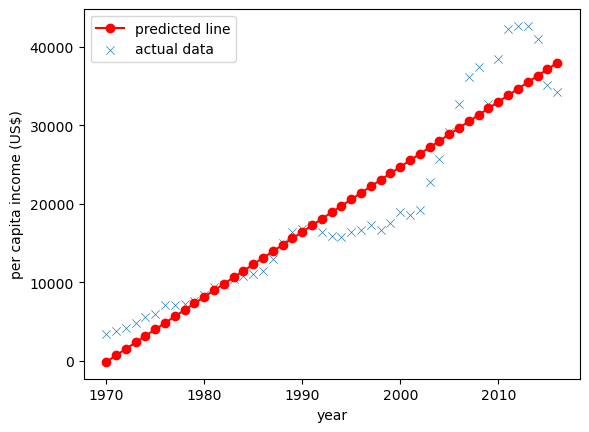

In [64]:
plt.plot(X, y_pred, color = 'red' , label = 'predicted line' , marker = 'o')
sns.scatterplot(data = df, x = 'year', y = 'per capita income (US$)', marker = 'x', label = 'actual data')
plt.legend()
plt.show()

<Axes: xlabel='year', ylabel='per capita income (US$)'>

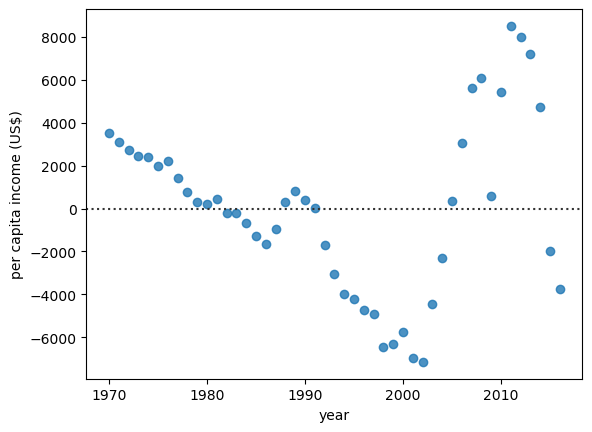

In [67]:
sns.residplot(x = X, y = y , data =df)

In [68]:
import pickle 
# Save: File
# load, dump: (model)
with open('capital_pred.pkl','wb') as f:
    pickle.dump(model,f)

print('done')

done
